# Lecture 20: Advanced Image Processing with Machine Learning

Welcome to the second part of our exploration into Image Processing with Machine Learning. In this session, we dive deeper into practical applications using the CIFAR-10 dataset. We'll explore various preprocessing techniques and their impact on model performance, offering a hands-on approach to understanding these concepts.


### Set up imports

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.color import rgb2gray
from skimage.filters import sobel

### Load images from CIFAR-10 Dataset

The CIFAR-10 dataset is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. [Learn more about CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html).

In [3]:
# use this function to load the CIFAR-10 dataset from the data folder
def load_cifar_batch(filename):
    """Load a single batch of CIFAR-10."""
    with open(filename, 'rb') as file:
        # The encoding 'bytes' is required for Python 3 compatibility
        batch = pickle.load(file, encoding='bytes')
        images = batch[b'data']
        labels = batch[b'labels']
        # Reshape the images: the dataset is flattened, so you need to reshape it to 32x32x3
        images = images.reshape((len(images), 3, 32, 32)).transpose(0, 2, 3, 1)
        labels = np.array(labels)
        return images, labels

In [4]:
# load batch 1 of CIFAR-10
file_name = 'data/batch_1'

images, labels = load_cifar_batch(file_name)


### Inspect images and labels

Understanding the structure and format of our dataset is crucial. Let’s start by examining the lengths of images and labels to get a sense of the dataset's size.

In [6]:
# look at length of images and labels
print(len(images))
print(len(labels))

10000
10000


### Inspect the first three images

Visualizing our data is just as important as understanding its structure. Let’s display the first few images from our dataset along with their corresponding labels to see what we’re working with.


0


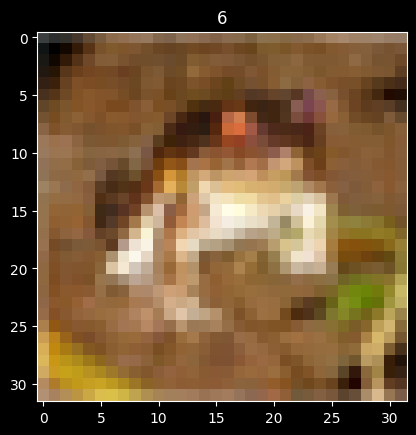

1


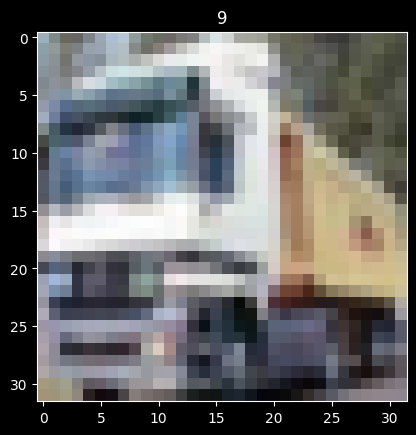

2


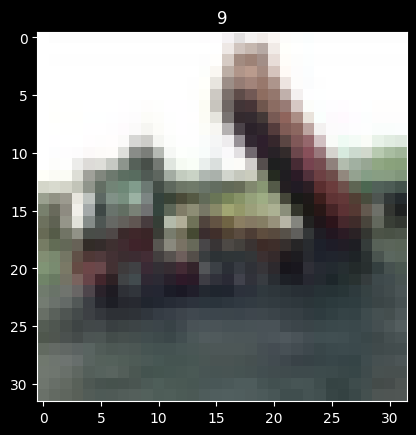

In [9]:
# Function to show an image
def show_image(img, label):
    plt.imshow(img)
    plt.title(label)
    plt.show()

# Show the first three images
for index in range(3):
    print(index)
    show_image(images[index], labels[index])

### Define labels
Each image in CIFAR-10 is associated with a label from 10 classes. Here, we define a list of label names to make our data more understandable.


In [10]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
label_names


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Inspect the first label

To further familiarize ourselves with the dataset, let's inspect the label of the first image. This step helps us connect an image with its categorical representation.


In [12]:
# inspect first label
first_label = labels[0]

label_names[first_label]

'frog'

In [13]:
# look at first image data
images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

### Preprocess data

Data preprocessing is a critical step in any machine learning workflow. Here, we'll normalize pixel values to improve our model's convergence during training. We'll also reshape the data to fit our model's input requirements.


In [14]:
# Normalize pixel values to be between 0 and 1
images_normalized = images / 255.0

images_normalized[0]


array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [15]:
# inspect the shape of the images
images_normalized.shape


(10000, 32, 32, 3)

In [16]:
# Flatten the images
images_flattened = images_normalized.reshape(images_normalized.shape[0], -1)

In [17]:
# inspect flattened images
images_flattened.shape

(10000, 3072)

In [18]:
32 * 32 * 3

3072

### Splitting Dataset into Training and Test Sets

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_flattened, labels, test_size=0.2, random_state=42)

In [20]:
# check that it worked
X_train.shape

(8000, 3072)

### Training a Machine Learning Model

In [21]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluating the Model
After training the model, evaluate its performance on the test set.

In [24]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Model accuracy: {accuracy:.2%}')



Model accuracy: 42.25%


### Activity: Preprocessing Techniques and Model Performance

Experiment with different preprocessing techniques. Assess how each technique affects the performance of a simple image classification model trained on the CIFAR-10 dataset. Reflect on your findings.


### Grayscale Preprocessing
Converting images to grayscale simplifies our model by reducing the dimensionality of the input data. Let’s preprocess our images into grayscale and evaluate how this impacts model performance.


Use this code to create an array of grayscale image data
```python
images_gray = rgb2gray(images)
```

In [ ]:
# create an array of grayscale images


In [ ]:
assert images_gray.shape == (10000, 32, 32)

In [ ]:
# inspect the first image


In [ ]:
# flatten the images to make them ready for the model 


In [ ]:
assert images_gray_flattened.shape == (10000, 1024)

### Grayscale model training
Perform a train test split and train a random forest model with 100 estimators and a random state of 42

In [ ]:
# do train test split


# initialize the model


# train the model


### Evaluate grayscale model
Use accuracy score to evaluate how preprocessing the data affects model performance

In [ ]:
# Make predictions


# Calculate accuracy


In [ ]:
assert accuracy == 0.373

### Use edge detection to preprocess images
Use scikit-image's [sobel](https://en.wikipedia.org/wiki/Sobel_operator) function to emphasize the edges of the grayscale images

```python
sobel_image = sobel(image)
```

In [ ]:
# write a list comprehension to create a list of grayscale edge-detected images


### Convert the list back to a numpy array

```python
images_edges = np.array(images_edges)
```

In [ ]:
# convert to numpy array


In [ ]:
# inspect the first image


In [ ]:
# inspect image_edges data


In [ ]:
# flatten the images to make them ready for the model 


### Train a random forest with 100 estimators and random state = 42

In [ ]:
assert accuracy_edges == 0.318